# **Polynomial Regression for Credit Risk Modeling**

In [1]:
# Install and configure Data from Kaggle
!pip install kaggle

# Ensure kaggle.json is uploaded to /root/.kaggle/kaggle.json
import os
os.environ['KAGGLE_USERNAME'] = "<krishna2206>"
os.environ['KAGGLE_KEY'] = "<691d17606e50c138613dc6a68999859b>"

# Download the dataset
!kaggle datasets download -d wordsforthewise/lending-club

#unzip the dataset
!unzip lending-club.zip -d lending_club_data

Dataset URL: https://www.kaggle.com/datasets/wordsforthewise/lending-club
License(s): CC0-1.0
 98% 1.23G/1.26G [00:11<00:00, 160MB/s]
100% 1.26G/1.26G [00:12<00:00, 111MB/s]
Archive:  lending-club.zip
  inflating: lending_club_data/accepted_2007_to_2018Q4.csv.gz  
  inflating: lending_club_data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: lending_club_data/rejected_2007_to_2018Q4.csv.gz  
  inflating: lending_club_data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


#**Overview**
Credit risk modeling often requires analyzing how client behavior impacts credit scores. A key variable is revolving credit utilization, which represents the percentage of available credit currently being used.

The relationship between utilization and FICO score is typically non-linear. Polynomial regression helps capture this non-linear effect by including squared or higher-order terms of utilization.

# **Methodology**

We use polynomial regression of the form:

\[
y = w_0 + w_1 x + w_2 x^2 + w_3 x^3
\]

Where:  
- \(x\) = credit utilization (%).  
- \(y\) = average FICO score.  
- \(w_0, w_1, w_2, w_3\) are learned coefficients.  

**Implementation steps:**  
1. Extract data from https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

  and make another field `fico_avg` from `fico_range_low` and `fico_range_high`
2. Extract `revol_util` (X) and `fico_avg` (y).  
3. Transform X into polynomial features using `PolynomialFeatures(degree=3)`.  
4. Fit a linear regression model to the transformed features.  
5. Predict FICO scores over a smooth utilization range.  
6. Plot data vs. fitted curve.  

**Pseudocode:**

```
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(poly.transform(X_range))

```





# **Multilingual Data Handling**
Financial datasets may include credit reports or statements in multiple languages. To ensure consistency, entries are first processed with language detection algorithms (e.g., fastText, langdetect) to identify the source language. Detected non-standard languages are then flagged or routed through domain-specific machine translation models to normalize content into a common analysis language. Maintaining language metadata alongside translated text preserves traceability and auditability. This workflow enables reliable, uniform analysis across multilingual datasets.

1. Language Detection: Apply models such as fastText or langdetect to automatically identify the language of each credit report or financial statement.

2. Flagging & Routing: Mark non-standard or non-primary languages and route them for further processing.

3. Domain-Specific Translation: Use financial-domain machine translation models to convert flagged entries into a common analysis language (e.g., English).

4. Normalization: Standardize terminology and units post-translation to align with internal data schemas.

5. Metadata Retention: Store original language identifiers alongside translated text for auditability and traceability




# **FinTech Applications**
Polynomial regression can model important non-linear credit risk relationships, such as:

* Client’s income vs. default probability.

* Age vs. credit score stability.

* Credit utilization vs. FICO score, as shown here.

By capturing these non-linearities, banks and financial institutions can make more accurate risk predictions.

# **Implementation**


In [2]:
#DATA LOADING

import pandas as pd

# Load dataset (adjust path to your downloaded CSV)
use_cols = ["fico_range_low", "fico_range_high", "revol_util"]
df = pd.read_csv("lending_club_data/accepted_2007_to_2018Q4.csv.gz", compression="gzip", usecols=use_cols)

# Drop missing values
df = df.dropna()

# Compute average FICO score
df["fico_avg"] = (df["fico_range_low"] + df["fico_range_high"]) / 2

# Final dataset
final_df = df[["revol_util", "fico_avg"]]

print(final_df.head())


   revol_util  fico_avg
0        29.7     677.0
1        19.2     717.0
2        56.2     697.0
3        11.6     787.0
4        64.5     697.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


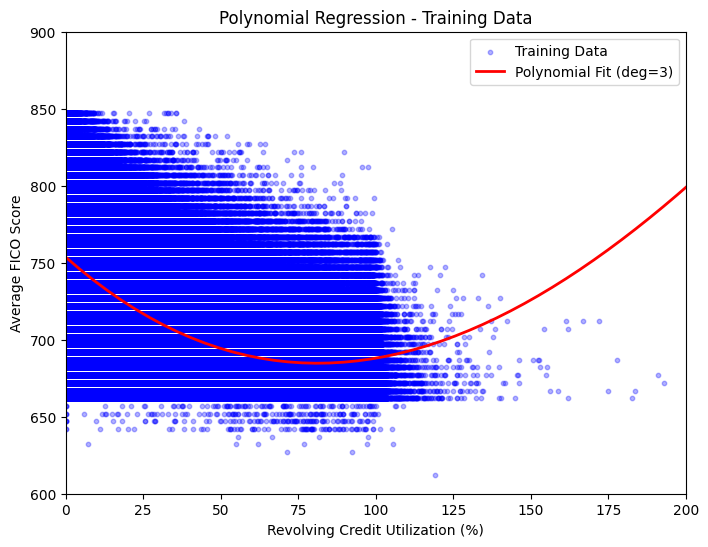

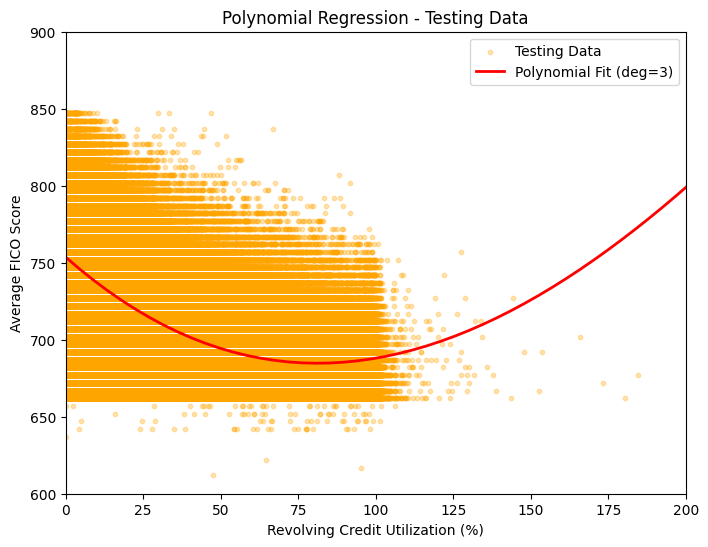

In [3]:

# MODEL TRAINING WITH TRAIN-TEST SPLIT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract relevant features
X = final_df[["revol_util"]].values
y = final_df["fico_avg"].values

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation (cubic), fit on TRAINING only
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions for smooth curve
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_range = model.predict(poly.transform(X_range))

# Plot 1: Training Data
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, s=10, alpha=0.3, label="Training Data", color="blue")
plt.plot(X_range, y_pred_range, color="red", linewidth=2, label="Polynomial Fit (deg=3)")
plt.xlabel("Revolving Credit Utilization (%)")
plt.ylabel("Average FICO Score")
plt.legend()
plt.title("Polynomial Regression - Training Data")
plt.xlim(0, 200)
plt.ylim(600, 900)
plt.show()

# Plot 2: Testing Data
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, s=10, alpha=0.3, label="Testing Data", color="orange")
plt.plot(X_range, y_pred_range, color="red", linewidth=2, label="Polynomial Fit (deg=3)")
plt.xlabel("Revolving Credit Utilization (%)")
plt.ylabel("Average FICO Score")
plt.legend()
plt.title("Polynomial Regression - Testing Data")
plt.xlim(0, 200)
plt.ylim(600, 900)
plt.show()




# **Evaluation Metrics**
We evaluate the model using **Root Mean Squared Error (RMSE)**

In [4]:
# EVALUATION METRICS
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)


Train RMSE: 28.152239897231418
Test RMSE: 28.11495354479754



# **Conclusion**

The cubic polynomial regression achieved an **RMSE ≈ 28**.  

#### **How to interpret this:**
- RMSE (**Root Mean Squared Error**) is the average deviation between predicted FICO scores and the actual scores.  
- In this case:
  - On average, the model’s predictions are off by about **28 FICO points**.  
  - Since FICO scores range from **300 to 850**, this represents a **moderately good fit**.  

#### **What this tells us:**
1. The cubic polynomial regression **captures the non-linear relationship** between utilization and credit score better than a simple straight line would.  
2. An RMSE of ~28 suggests the model explains a significant part of the variance, but not perfectly. This is because real-world credit scores depend on many additional factors beyond utilization like payment history, income, loan types.   


